<a href="https://colab.research.google.com/github/alvinwalker314/AB-Demo/blob/master/DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
#import libraries I'll need
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [160]:
#uploaded files from local drive
from google.colab import files
uploaded= files.upload()

Saving crx.data to crx (4).data


In [175]:
#store file as a dataframe, replace ? with NaN values, dropped all NaN, and checked if i had the right amount of features. 
df= pd.read_csv('crx.data').replace('?', np.NaN)
df.head(100)
df.isna().sum()
df= df.dropna()
df.shape

(652, 16)

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [176]:
#created 2 subsets of data i will be testing with
positive= df[df['+']== '+']
negative= df[df['+']== '-']

#Ttest 1
stats.ttest_ind(negative['1.25'], positive['1.25'])

Ttest_indResult(statistic=-9.020662467924037, pvalue=2.0835108311601946e-18)

Text(0, 0.5, 'Mean')

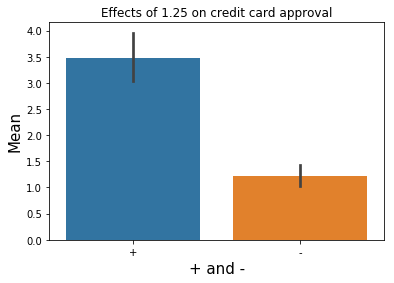

In [180]:
#Barplot with 95 ci
sns.barplot(data= df, x= '+', y= '1.25');

#cosmetic
plt.title("Effects of 1.25 on credit card approval");
plt.xlabel('+ and -', size= 15)
plt.ylabel('Mean', size= 15)
#Conclusion Due to an extremly low pvalue, I believe that the feature 1.25 has significant effect on whether or not you are approved for a credit

In [174]:
#2nd Ttest
stats.ttest_ind(negative['01'], positive['01'])

Ttest_indResult(statistic=-11.358835276384589, pvalue=2.1156266716722337e-27)

Text(0.5, 0, '+ and -')

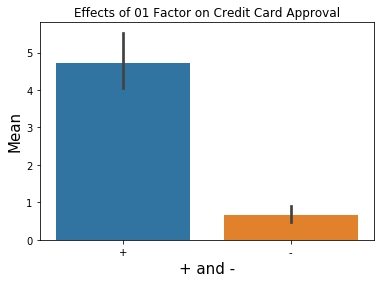

In [181]:
#plot with confidence interval of 95
sns.barplot(data=df, x='+', y='01')

#cosmetic
plt.title('Effects of 01 Factor on Credit Card Approval')
plt.ylabel('Mean', size= 15)
plt.xlabel('+ and -', size=15)
#conclusion
#This T-test shows the factor 01 has a pretty signifcant effect on whether or not you get approved.

In [164]:
#first chi2 test
#created a crosstab of all b values
b= pd.crosstab(df['+'], df['b'])

#check for dependancy using chi2 test
chi2, p_value, dof, expected= stats.chi2_contingency(b)
print(chi2, p_value)

#checked whether the observed and expected frequencies were the same
print(stats.chisquare(b, expected, axis=None))

0.2030509245373979 0.6522694163316629
Power_divergenceResult(statistic=0.2868392888819498, pvalue=0.9624843486979495)


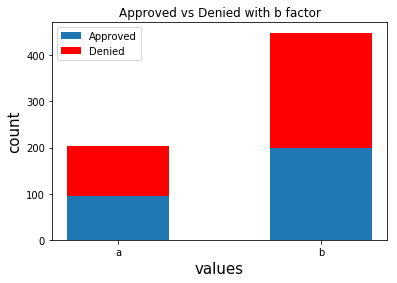

In [168]:
#located values in b crosstab
pos_b= b.iloc[0][0:2].values
neg_b= b.iloc[1][0:2].values

#created list of b categories
categories= ['a', 'b']

#plotted values
p1= plt.bar(categories, pos_b, 0.5);
p2= plt.bar(categories, neg_b, 0.5, bottom= pos_b, color= 'red');

#cosmetic
plt.legend((p1[0],p2[0]), ('Approved', 'Denied'));
plt.title('Approved vs Denied with b factor');
plt.ylabel('count', size= 15);
plt.xlabel('values', size= 15);

#Conculsion
#It seems the bfactor and class attribute are independant of eachother, and the expected frequencies are very close to the observed.

In [166]:
##2nd chi2 test
#created v crosstab
v= pd.crosstab(df['+'], df['v'])

#tested for dependancy
chi2, p_value, dof, expected= stats.chi2_contingency(v)
print(chi2, p_value)

#tested relationship between observed and expected frequencies
stats.chisquare(v, expected, axis= None)

43.118632243904564 8.343769233910923e-07


Power_divergenceResult(statistic=43.118632243904564, pvalue=0.0004613499356434303)

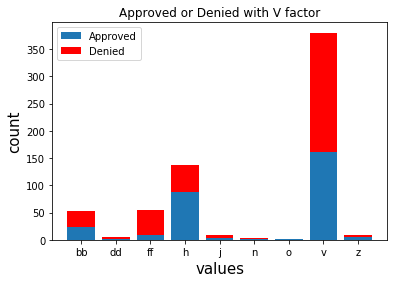

In [167]:
#created list of all values in v column
v_categories=[
    'bb',
    'dd',
    'ff',
    'h',
    'j',
    'n',
    'o',
    'v',
    'z'
]

#located pos and neg values in v crosstab
pos_v= v.iloc[0][0:9].values
neg_v= v.iloc[1][0:9].values

#plotted values
p1= plt.bar(v_categories, pos_v);
p2= plt.bar(v_categories, neg_v, bottom= pos_v, color= 'red');

#cosmetic
plt.title('Approved or Denied with V factor');
plt.legend((p1[0], p2[0]), ('Approved', 'Denied'));
plt.ylabel('count', size= 15);
plt.xlabel('values', size= 15);

#Conclusion
#Due to the low P and high chi, i believe that there is a dependancy between the bvalues and class attribute. The observed and expected are pretty different

#Hardest Part of the sprint challenge was deriving meaning from the stats. I wish it was more intuitive for me, but that comes with repetition. 

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

*Your words here!*
